<a href="https://colab.research.google.com/github/ksrno/CIND820-Final-Project/blob/main/Initial_Code_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question:
There is a equal frequency of accidents during evening hours vs overnight and morning hours.(12-8, 8-4, 4-12)

Government officials are looking to find what time of day has the most frequent amount of accidents. With this information we can pre-position ambulances, police or tow trucks during high-risk hours. This will also help us identify optimal signal timing to optimize traffic signal cycles during high-risk periods.

In [ ]:
#Load Data
import pandas as pd
df = pd.read_csv('/content/traffic_accidents.csv')

In [ ]:
#Take crash_hour column and separate the times in 3 blocks to show as evening, morning/afternoon and overnight
def map_day_segment(hour):
  if 0<= hour <8:
    return 'Overnight'
  elif 8 <= hour <16:
    return 'Day'
  else:
    return 'Evening'

In [ ]:
#Create new column with day mapping
df['day_segment'] = df['crash_hour'].apply(map_day_segment)

In [ ]:
#Verify the new column
df['day_segment'].value_counts()

,count
day_segment,
Day,92641
Evening,83905
Overnight,32760


In [ ]:
#Count accidents in relation to the 3 time blocks
df.day_segment.count

<bound method Series.count of 0               Day
1         Overnight
2               Day
3           Evening
4               Day
            ...    
209301          Day
209302          Day
209303          Day
209304          Day
209305          Day
Name: day_segment, Length: 209306, dtype: object>

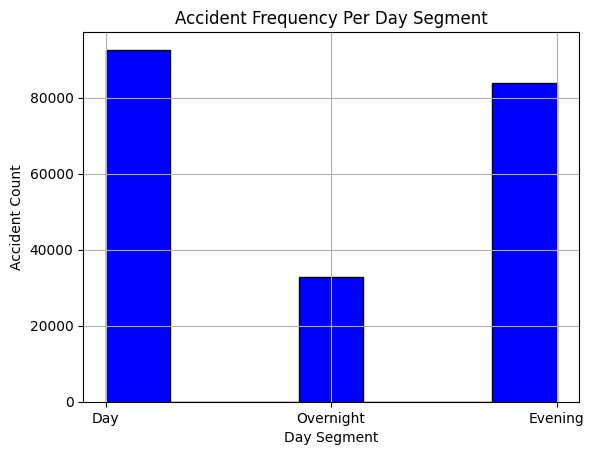

In [ ]:
#Visualize distribution using histogram
import matplotlib.pyplot as plt
df['day_segment'].hist(bins=7, color = 'blue', edgecolor = 'black')
plt.title('Accident Frequency Per Day Segment')
plt.xlabel('Day Segment')
plt.ylabel('Accident Count')

plt.show()

In [ ]:
#Use chi-square test to confirm that the time of day matter statistically
from scipy.stats import chisquare

observed = df['day_segment'].value_counts().sort_index()

expected = [len(df) / 3] * 3

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")



#If p < 0.05 then we will reject the null hypothesis as frequency is not equal
#If p >= 0.05 we will not reject the null hypothesis


Chi-square statistic: 29993.707
P-value: 0.000


This result along with the histogram shows that accident frequency is not evenly distributed across the time segmens and the difference is not due to random chance.

Some information that may prove valuable to this analysis would be data to note the volume of drivers on the road during these times as most likely the difference between overnight and the other time segments is related to vehicle volume.